<a href="https://colab.research.google.com/github/zenikigai/Pengembangan_Machine_Learning_IDcamp2023/blob/main/Real_world_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create and Train Models to Process Image Datasets from the Real World

In [4]:
# download dataset
!wget --no-check-certificate \
   https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
   -O /tmp/Chessman-image-dataset.zip

--2023-12-16 14:47:07--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-12-16 14:47:08--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   150MB/s    in 

In [5]:
# extract the downloaded dataset
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [6]:
# show direct
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Bishop', 'Knight', 'Queen', 'Pawn', 'King']

In [7]:
# show how many images on each of these directories
print("toal Pawn images : ", len(os.listdir("/tmp/Chessman-image-dataset/Chess/Pawn")))
print("toal King images : ", len(os.listdir("/tmp/Chessman-image-dataset/Chess/King")))
print("toal Knight images : ", len(os.listdir("/tmp/Chessman-image-dataset/Chess/Knight")))

toal Pawn images :  107
toal King images :  76
toal Knight images :  106


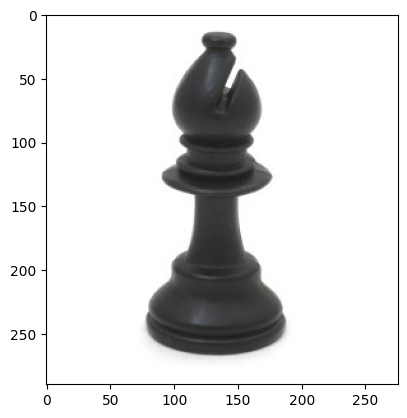

In [9]:
# example of an image on dataset
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img("/tmp/Chessman-image-dataset/Chess/Bishop/00000003.png")
imgplot = plt.imshow(img)

we just simply tell ImageDataGenerator which data is for training and which data is for testing by adding a subset parameter with the value of training or validation.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join("/tmp/Chessman-image-dataset/Chess")
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   fill_mode = "nearest",
                                   validation_split = 0.1)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = "categorical",
    subset = "training" # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size = (150, 150),
    batch_size = 16,
    class_mode = "categorical",
    subset = "validation"
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [12]:
# determine the architecture of our model
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
model = Sequential([
    # note the input shape is the desired size of the image 150 x 150 with 3 bytes of color
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.4),

    # flatten the results to feed into a DNN
    Flatten(),
    # 512 neurons hidden layer
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(6, activation="softmax"),
])

In [13]:
# determine optimizer and loss
model.compile(optimizer = tf.optimizers.Adam(),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [15]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
63/63 [==============================] - 39s 615ms/step - loss: 1.2482 - accuracy: 0.5170 - val_loss: 1.5394 - val_accuracy: 0.3269
Epoch 2/100
63/63 [==============================] - 41s 648ms/step - loss: 1.2518 - accuracy: 0.5030 - val_loss: 1.5697 - val_accuracy: 0.3654
Epoch 3/100
63/63 [==============================] - 40s 629ms/step - loss: 1.1962 - accuracy: 0.5391 - val_loss: 1.5994 - val_accuracy: 0.3654
Epoch 4/100
63/63 [==============================] - 48s 756ms/step - loss: 1.1633 - accuracy: 0.5671 - val_loss: 1.7051 - val_accuracy: 0.4423
Epoch 5/100
63/63 [==============================] - 40s 628ms/step - loss: 1.0924 - accuracy: 0.5832 - val_loss: 1.5492 - val_accuracy: 0.4615
Epoch 6/100
63/63 [==============================] - 42s 666ms/step - loss: 1.0796 - accuracy: 0.6052 - val_loss: 1.5125 - val_accuracy: 0.4423
Epoch 7/100
63/63 [==============================] - 42s 666ms/step - loss: 1.0421 - accuracy: 0.5812 - val_loss: 1.6640 - val_accuracy:

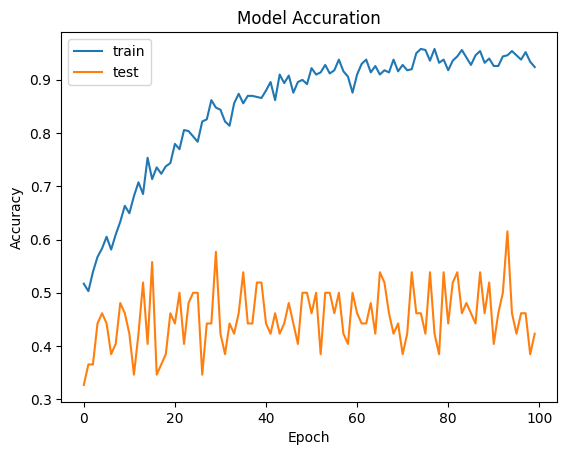

In [16]:
# plot accuration
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuration")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

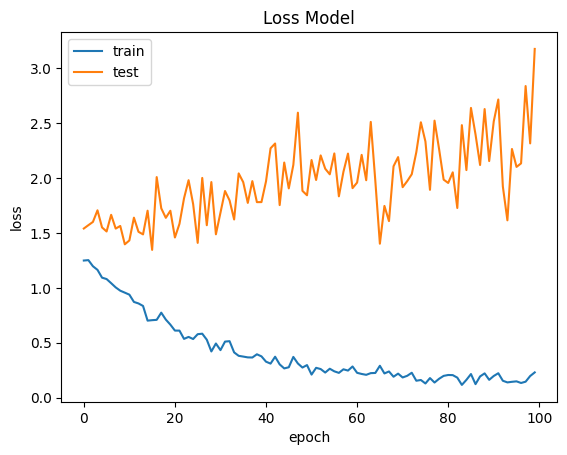

In [17]:
# plot loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Model")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()